# TEMPLATE 2 - MODEL

# Libraries

In [85]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
#from google.colab import drive     # Drive en Colab

pd.set_option('display.max_columns',100) 
pd.set_option('display.max_rows',100)  # para visualizar mas columnas y filas en un df

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

from pickle import dump    # guardar archivos comprimidos

# Load clean data

In [86]:
df = pd.read_csv('data\clean_data.csv', index_col=False)

In [87]:
df.head()

,rev,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_dat,recv_vce,recv_sms,custcare,ccrndmou,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,drop_blk,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,asl_flag,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,...,area_DC/MARYLAND/VIRGINIA AREA,area_FLORIDA,area_GREAT LAKES AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_SOUTHWEST AREA,area_TEXAS,dualband_N,dualband_T,dualband_Y,hnd_webcap_WC,ownrent_O,ownrent_R,dwlltype_M,dwlltype_S,dwlltype_U,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_I,HHstatin_U,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_J,dwllsize_O,dwllsize_Other,dwllsize_U,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_Other,ethnic_S,ethnic_U,ethnic_Z
0,23.9975,219.25,22.500,0.2475,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,0.0,42.333333,0.0,0.000000,0.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,1.333333,45.000000,0.0,0.333333,1,61,2,1,False,1453.44,4085.00,1602,29.66,83.37,32.69,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,57.4925,482.75,37.425,0.2475,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,0.0,69.000000,0.0,1.666667,6.333333,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,9.333333,193.333333,0.0,5.666667,0,56,1,1,False,2833.88,26367.00,14624,51.53,479.40,265.89,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,16.9900,10.25,16.990,0.0000,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.333333,6.000000,0.0,0.000000,1,58,1,1,False,1934.47,24303.05,7888,34.54,433.98,140.86,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,38.0000,7.50,38.000,0.0000,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.333333,0.0,0.000000,0.000000,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.000000,3.666667,0.0,0.000000,0,60,1,1,False,1941.81,3035.00,1479,40.45,63.23,30.81,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55.2300,570.50,71.980,0.0000,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,0.0,94.666667,0.0,8.666667,15.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,10.333333,137.000000,0.0,0.000000,0,57,1,1,False,2166.48,13965.00,4452,38.69,249.38,79.50,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Split X-y

In [88]:
target = 'churn'
features = df.columns[df.columns != target]

# Target distribution

[]

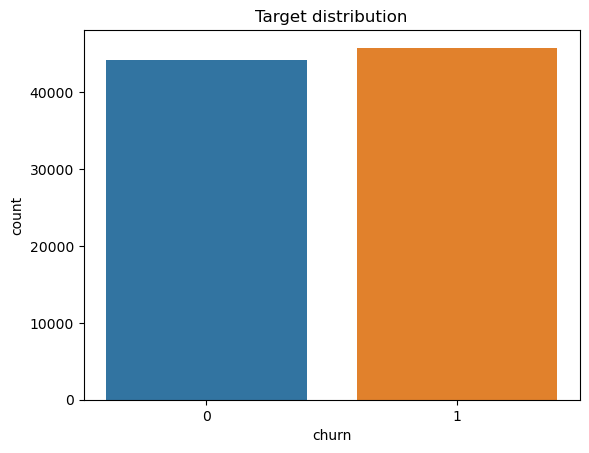

In [89]:
sns.countplot(df[target])
plt.title('Target distribution')
plt.plot()

Hago un plot de mi target para ver la distribucion. Como ya confirmado en el preprocessing veo que esta balanceado. No hace falta hacer Undersampling

# Undersampling (*)

**NOTA:** SOLO EN CLASIFICACIÓN cuando el ratio de éxitos está MUY DESBALANCEADO (<10%).

In [90]:
#from imblearn.under_sampling import RandomUnderSampler

# Split TRAIN-TEST data

In [91]:
X = df[features]
y = df[target]

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
test_rate = 0.2
total_rows = len(y)
test_size = int(test_rate*total_rows)
train_size = total_rows - test_size

print('TRAIN-VALIDA: %d (%.1f%%)' %(train_size,(100-test_rate*100)))
print('TEST: %d (%.1f%%)' %(test_size,(test_rate*100)))

TRAIN-VALIDA: 72000 (80.0%)
TEST: 18000 (20.0%)


In [113]:
X_train = X.head(train_size)
y_train = y.head(train_size)
X_test = X.tail(test_size)
y_test = y.tail(test_size)

# Rescaling

* NO NECESARIO en modelos de arboles de decisión.
* .fit en datos de TRAIN.

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [97]:
X_train_std = pd.DataFrame(data = X_train, columns=X_train.columns, index=X_train.index)    
X_test_std = pd.DataFrame(data = X_test, columns=X_test.columns, index=X_test.index)  

In [98]:
X_train.head()

,rev,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_dat,recv_vce,recv_sms,custcare,ccrndmou,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,drop_blk,complete,callfwdv,callwait,months,uniqsubs,actvsubs,asl_flag,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3qty,...,area_DC/MARYLAND/VIRGINIA AREA,area_FLORIDA,area_GREAT LAKES AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_SOUTHWEST AREA,area_TEXAS,dualband_N,dualband_T,dualband_Y,hnd_webcap_WC,ownrent_O,ownrent_R,dwlltype_M,dwlltype_S,dwlltype_U,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_I,HHstatin_U,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_J,dwllsize_O,dwllsize_Other,dwllsize_U,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_Other,ethnic_S,ethnic_U,ethnic_Z
0,23.9975,219.25,22.500,0.2475,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,0.0,42.333333,0.0,0.000000,0.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,1.333333,45.000000,0.0,0.333333,61,2,1,False,1453.44,4085.00,1602,29.66,83.37,32.69,116,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,57.4925,482.75,37.425,0.2475,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,0.0,69.000000,0.0,1.666667,6.333333,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,9.333333,193.333333,0.0,5.666667,56,1,1,False,2833.88,26367.00,14624,51.53,479.40,265.89,158,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,16.9900,10.25,16.990,0.0000,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.333333,6.000000,0.0,0.000000,58,1,1,False,1934.47,24303.05,7888,34.54,433.98,140.86,7,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,38.0000,7.50,38.000,0.0000,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,1.333333,0.0,0.000000,0.000000,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.000000,3.666667,0.0,0.000000,60,1,1,False,1941.81,3035.00,1479,40.45,63.23,30.81,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55.2300,570.50,71.980,0.0000,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,0.0,94.666667,0.0,8.666667,15.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,10.333333,137.000000,0.0,0.000000,57,1,1,False,2166.48,13965.00,4452,38.69,249.38,79.50,191,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [99]:
# Save scaler
dump(scaler, open('scaler.pkl', 'wb'))

# TRAIN-VALIDATION

## Model Competition

Probamos una colección de modelos con el objetivo de conseguir el mejor rendimiento del modelo en los datos de VALIDACION.

In [100]:
#!pip install xgboost

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [102]:
#model_pipeline = []
#model_pipeline.append(LogisticRegression(solver='liblinear'))
#model_pipeline.append(SVC())
#model_pipeline.append(KNeighborsClassifier())
#model_pipeline.append(DecisionTreeClassifier())
#model_pipeline.append(RandomForestClassifier())
#model_pipeline.append(GaussianNB())




In [103]:
#model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
#acc_list=[]
#auc_list=[]
#cm_list = []

#for model in model_pipeline :
#    model.fit(X_train, y_train)
#    y_train_pred = model.predict(X_train)
#    acc_list.append(metrics.accuracy_score(y_train, y_train_pred))
#    fpr, tpr, _thresholds = metrics.roc_curve(y_train, y_train_pred)
#    auc_list.append(round(metrics.auc(fpr, tpr), 2))
#    cm_list.append(confusion_matrix(y_train, y_train_pred))



In [104]:
#df_result = pd.DataFrame({'Model' : model_list, 'Accuracy' : acc_list, 'AUC' : auc_list,'Cross Validation' : cross_valida})
#df_result

In [105]:
from sklearn.model_selection import cross_val_score


In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [107]:
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])  

# Calculo del AUC de un modelo sobre un dataset con Cross-Validation (X-y). Args: modelo a validar, X, y  
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model, 
                              X, y, 
                              cv=4,                 # Numero de folds que vamos a utilizar para validar 
                              scoring='roc_auc'     # La metrica de validacion que se medira en cada train-valida
                              )    
  return cross_val.mean()

In [108]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

# Completa un registro en dataframe con los resultados de las funciones definidas previsamente ( AUC y AUC con cross-validation)

# Inputs: 
#   * modelo
#   * (X,y) 
#   * label especifico si queremos registrar el resultado con otro nombre (opcional)


def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)
  
  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)   
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

In [54]:
evaluate_classification(model = LogisticRegression(), 
                        X = X_train_std, 
                        y = y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.632704,0.624844


In [55]:
from sklearn.ensemble import AdaBoostClassifier

evaluate_classification(model = AdaBoostClassifier(), X = X_train, y = y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.632704,0.624844
1,AdaBoostClassifier(),0.650928,0.574386


In [56]:
from sklearn.ensemble import BaggingClassifier

evaluate_classification(model = BaggingClassifier(), X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.632704,0.624844
1,AdaBoostClassifier(),0.650928,0.574386
2,BaggingClassifier(),0.998999,0.486589


In [57]:
from sklearn.ensemble import GradientBoostingClassifier

evaluate_classification(model = GradientBoostingClassifier(), X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.632704,0.624844
1,AdaBoostClassifier(),0.650928,0.574386
3,GradientBoostingClassifier(),0.678072,0.566993
2,BaggingClassifier(),0.998999,0.486589


In [58]:
from sklearn.ensemble import RandomForestClassifier

evaluate_classification(model = RandomForestClassifier(), X=X_train, y=y_train)

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

evaluate_classification(model = HistGradientBoostingClassifier(), 
                        X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.632939,0.625057
1,AdaBoostClassifier(),0.650868,0.572698
4,RandomForestClassifier(),1.000000,0.569126
3,GradientBoostingClassifier(),0.678172,0.563660
5,HistGradientBoostingClassifier(),0.736894,0.540190
2,BaggingClassifier(),0.999091,0.489993


In [ ]:


evaluate_classification(model = XGBClassifier(), 
                        X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.632939,0.625057
1,AdaBoostClassifier(),0.650868,0.572698
4,RandomForestClassifier(),1.000000,0.569126
3,GradientBoostingClassifier(),0.678172,0.563660
5,HistGradientBoostingClassifier(),0.736894,0.540190
6,"XGBClassifier(base_score=None, booster=None, c...",0.842109,0.535749
2,BaggingClassifier(),0.999091,0.489993


In [ ]:
#from sklearn.svm import SVC

#evaluate_classification(model=SVC(probability=True),
 #                       X=X_train_std, y=y_train)

## Hyperparameter tuning

Probamos diferentes configuraciones de los parametros del modelo ganador en el torneo de modelos con el objetivo de conseguir el mejor performance del modelo en los datos de VALIDACION.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

## Select best model

In [110]:
best_model = LogisticRegression()

In [ ]:
#Save model
dump(best_model, open('path/model.pkl', 'wb'))

# TEST

* Evaluación de las métricas de performance en TEST.
  * Clasificación: AUC, ROC curve, F1-score, Accuracy, Precision, Recall.
  * Regresión: RMSE, R2-score, MAE, MAPE%, distribucion del error.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [115]:
def auc_test(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])  

In [117]:
auc_test(model=best_model, X=X_test, y=y_test)

0.6221842260575777

In [118]:
y_test_pred = best_model.predict(X_test)

In [119]:
y_test_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

# Interpretability / Explainability

* En modelos lineales: top features por peso de los coeficentes y formula del modelo.
* En modelos de arboles: Feature Importance y/o SHAP values y plot arbol de decision.

In [ ]:
#from xgboost import plot_tree
#import shap